In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import rc

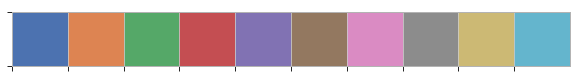

In [2]:
sns.set_style("whitegrid", {'xtick.bottom': True, 'ytick.left': True, 
                            'font.family': ['Liberation Sans'], 'axes.edgecolor': '0.7',
                            'grid.color': '.8'})
sns.set_context('paper')

flatui = ["#44bfaa","#9b59b6", "#e74c3c", "#34495e", "#3498db", "#95a5a6"]
flatui_original = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ["windows blue",  "faded green" ,"dusty purple", "faded red", "dark yellow", "greyish"]

sns.set_palette('deep')
sns.palplot(sns.color_palette())

c = sns.color_palette()

In [3]:
def get_OP_Q_from_df(df, network, N):
    op = df['OP'].loc[network]
    q = df['Q'].loc[network]
    return int(op*N), round(q,3)

def get_heurs_from_df(df, network, N):
    hba = df['HBA'].loc[network]
    mba = df['MBA'].loc[network]
    ci = df['CI'].loc[network]
    average = df['Average'].loc[network]
    return int(hba*N), int(mba*N), int(ci*N), int(round(average*N,0))

## N bruteforce

In [33]:
df_k3_100_5 = pd.read_csv('k_3/networks/results/data_100_5.csv', index_col = 0)
df_k3_100_3 = pd.read_csv('k_3/networks/results/data_100_3.csv', index_col = 0)
df_k3_100_4 = pd.read_csv('k_3/networks/results/data_100_4.csv', index_col = 0)
df_k3_100_6 = pd.read_csv('k_3/networks/results/data_100_6.csv', index_col = 0)

In [39]:
df_k4_100_5 = pd.read_csv('k_4/results/data_100_5.csv', index_col = 0)
df_k4_100_3 = pd.read_csv('k_4/results/data_100_3.csv', index_col = 0)
df_k4_100_4 = pd.read_csv('k_4/results/data_100_4.csv', index_col = 0)
df_k4_100_6 = pd.read_csv('k_4/results/networksinfo100_6.dat', sep =" ", index_col = 0)

In [49]:
df_k6_100_5 = pd.read_csv('k_6/results/data_100_5.csv', index_col = 0)
df_k6_100_3 = pd.read_csv('k_6/results/data_100_3.csv', index_col = 0)
df_k6_100_4 = pd.read_csv('k_6/results/data_100_4.csv', index_col = 0)
df_k6_100_6 = pd.read_csv('k_6/results/networksinfo100_6.dat', sep =" ", index_col = 0)

In [34]:
df_k3_120_6 = pd.read_csv('k_3/networks/results/data_120_6.csv', index_col = 0)
df_k3_120_3 = pd.read_csv('k_3/networks/results/data_120_3.csv', index_col = 0)
df_k3_120_4 = pd.read_csv('k_3/networks/results/data_120_4.csv', index_col = 0)
df_k3_120_5 = pd.read_csv('k_3/networks/results/networksinfo120_5.dat', sep =" ", index_col = 0)

In [35]:
df_k3_080_4 = pd.read_csv('k_3/networks/results/data_080_4.csv', index_col = 0)
#df_k3_080_3 = pd.read_csv('k_3/networks/results/data_080_k3_3.csv', index_col = 0)
#df_k3_080_5 = pd.read_csv('k_3/networks/results/data_080_k3_5.csv', index_col = 0)
df_k3_080_3 = pd.read_csv('k_3/networks/results/networksinfo080_3.dat', sep =" ", index_col = 0)
df_k3_080_5 = pd.read_csv('k_3/networks/results/networksinfo080_4.dat', sep =" ", index_col = 0)
df_k3_080_6 = pd.read_csv('k_3/networks/results/networksinfo080_6.dat', sep =" ", index_col = 0)

### 80 - 4

In [42]:
files_bruteforce_results = sorted(glob.glob("k_3/networks/080/net*/gcn4*.dat"))
bf_df = pd.DataFrame({}, index = range(1,77))

cols = sorted(df_k3_080_4.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=76,dtype=int)
    bf_df[cols[i]] = x
    
bf_df_k3_080_4 = bf_df

### 100 - 5

In [48]:
files_bruteforce_results = sorted(glob.glob("k_3/networks/100/mu*/net*/gcn5*"))
bf_df = pd.DataFrame({}, index = range(1,96))

cols = sorted(df_k3_100_5.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=95,dtype=int)
    bf_df[cols[i]] = x
    
bf_df_k3_100_5 = bf_df

### 120 - 6

In [41]:
files_bruteforce_results = sorted(glob.glob("k_3/networks/120/net*/gcn6*"))
bf_df = pd.DataFrame({}, index = range(1,115))

cols = sorted(df_k3_120_6.index)

for i,file in enumerate(files_bruteforce_results):
    x = np.loadtxt(file, max_rows=114,dtype=int)
    bf_df[cols[i]] = x
    
bf_df_k3_120_6 = bf_df


## N vs Q range

In [51]:
q_075 = ["net34", "mu02/net30", "net09"]
q_68 = ["net20", "mu03/net20","net30"]
q_81 = ["net11", "mu07/net33","net26"]

In [70]:
def set_plot_stuff(ax):
    
    ax.legend(fontsize = 14,frameon = True, markerscale = 1)
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    ax.tick_params(labelsize = 14)
    
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)

KeyError: 'net11'

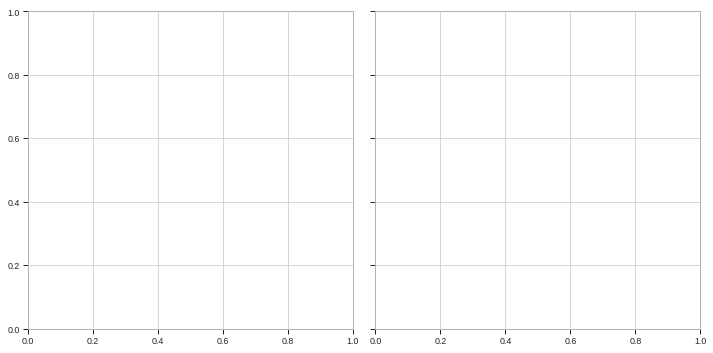

In [90]:
names = q_81

#dfs = [(df_k3_080_4, bf_df_k3_080_4), (df_k3_100_5, bf_df_k3_100_5), (df_k3_120_6, bf_df_k3_120_6)]

dfs = [(df_k3_100_5, bf_df_k3_100_5), (df_k3_120_6, bf_df_k3_120_6)]
N = [80,100,120]
lt = ['--', '-.', ':','-']
verde = "#3d8a63"

#fig, ax = plt.subplots(1,3, figsize=(15,5),tight_layout=True, sharey = True)
fig, ax = plt.subplots(1,2, figsize=(10,5),tight_layout=True, sharey = True)


for i, name in enumerate(names):
#     for line in get_heurs_from_df(df_main, names[2],100):
#         line = dataHeuristics.iloc[38, col+1]
#         ax[i].axvline(z-1, linestyle = lt[col], color='#333333', lw = 2, label = dataHeuristics.columns[col+1])
    
    op, q = get_OP_Q_from_df(dfs[i][0], name, N[i])
    
    comb = dfs[i][1].sum()[0]
    
    dist_data = (dfs[i][1][name][op-1:])/comb
    x = list(dist_data.index)

    ax[i].bar(x, dist_data, color=verde)
    ax[i].set_yscale("log")

    start_tick = op - op%10 + 10 
    xticks = np.arange(start_tick ,len(dfs[i][1]) + 1, 10, dtype = int)

    ax[i].set_xlim([op-1, len(dfs[i][1]) + 1])
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    
    set_plot_stuff(ax[i])
    ax[i].set_xlabel("S")

    
    ax[i].grid(b = False, axis = "x")
    ax[i].get_legend().remove()
    
    ax[i].set_title("N = " + str(N[i]) + " - Q = " + str(q), fontsize = 16)

ax[0].set_ylabel("Número de Ataques")
plt.minorticks_off()
#fig.savefig("figs_dissertacao/histograma_triplo_N_Qalto.png", dpi=300)

/home/usuario/anaconda2/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


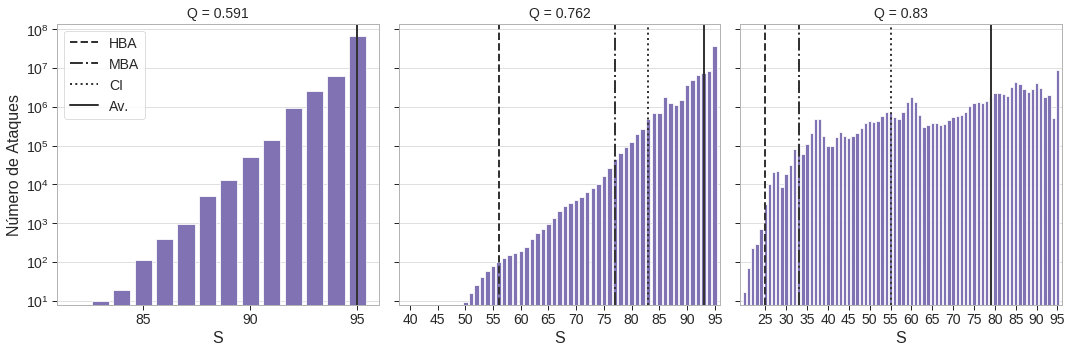

In [114]:
#names = [ "mu05/net02", "mu03/net23", "mu07/net06"]
#names = [ "mu05/net09", "mu07/net13", "mu07/net38"]
#names = [ "mu06/net10", "mu07/net13", "mu07/net32"]
names = [ "mu06/net10", "mu02/net14", "mu07/net32"]
lt = ['--', '-.', ':','-']
labels = ["HBA", "MBA", "CI", "Av."]
verde = "#3d8a63"
roxo = sns.color_palette()[4]

fig, ax = plt.subplots(1,3, figsize=(15,5),tight_layout=True, sharey=True)
#fig, ax = plt.subplots(1,2, figsize=(10,5),tight_layout=True, sharey=True)

for i, name in enumerate(names):
#for i, name in enumerate(names[1:]):
    
    for j,line in enumerate(get_heurs_from_df(df_100_5, name,100)):
        ax[i].axvline(line, linestyle = lt[j], color='#333333', lw = 2, label = labels[j])
    
    op, q = get_OP_Q_from_df(df_100_5, name, 100)
    
    dist_data = bf_df_k3_100_5[name][op-1:]
    x = list(dist_data.index)

    ax[i].bar(x, dist_data, color=roxo)
    ax[i].set_yscale("log")

    start_tick = op - op%5 + 5 
    xticks = np.arange(start_tick ,96, 5, dtype = int)

    ax[i].set_xlim([op-1, 96])
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticks)
    plt.minorticks_off()
    ax[i].tick_params(labelsize = 14)
    ax[i].set_xlabel("S", fontsize=16)


    set_plot_stuff(ax[i])
    ax[i].grid(b = False, axis = "x")
    if i == 0:
        ax[i].legend(fontsize=14)
    else:
        ax[i].get_legend().remove()
    
    ax[i].set_title("Q = " + str(q), fontsize = 14)
    
#    ax[i].text(op,10**7, q)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

ax[0].set_ylabel("Número de Ataques", fontsize = 16)

#fig.savefig("figs_dissertacao/histograma_triplo_3.png", dpi=300)

In [112]:
df_100_5[100:]

,Q,OP,Average,AV/OP,MBA,HBA,CI
names,,,,,,,
mu02/net31,0.753,0.42,0.930,2.214,0.79,0.44,0.79
mu01/net33,0.754,0.75,0.950,1.266,0.94,0.95,0.95
mu02/net45,0.756,0.42,0.917,2.183,0.90,0.50,0.86
mu02/net46,0.756,0.34,0.911,2.680,0.69,0.34,0.52
mu02/net12,0.757,0.67,0.940,1.403,0.95,0.72,0.95
mu02/net23,0.759,0.47,0.915,1.948,0.94,0.49,0.95
mu02/net50,0.759,0.44,0.935,2.126,0.90,0.53,0.86
mu02/net51,0.759,0.44,0.932,2.118,0.56,0.53,0.87
mu02/net49,0.760,0.52,0.913,1.756,0.75,0.63,0.85
